<a href="https://colab.research.google.com/github/olumideadekunle/LSTM-Sentiment-Model-LSTM-Twitter-Sentiment/blob/main/LSTM_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Presentation Structure & Talking Points:

##Introduction: The Problem (Sentiment is Business Critical)
Goal: Hook the investors by explaining why sentiment analysis is important in today's data-driven world.
Talking Points:

"In today's competitive landscape, public opinion and customer sentiment directly impact brand reputation, sales, and customer loyalty."
"Businesses are constantly mentioned online (social media, reviews), but manually understanding this massive volume of feedback is impossible."
"Negative sentiment can spread rapidly and damage a brand, while positive sentiment represents opportunities."

"Our project addresses this challenge by providing an automated, scalable solution to understand sentiment."
Our Solution: Sentiment Analysis Project
Goal: Briefly introduce your project and what it does.


## Talking Points:
"We have developed a sentiment analysis system using advanced machine learning techniques to automatically classify text data into positive, negative, and neutral categories."
"This allows businesses to quickly process vast amounts of text and gain actionable insights."
The Data: Understanding the Foundation
Goal: Show the type of data you work with and its characteristics. (Use your sentiment distribution plot here).


## Talking Points:
"We trained and validated our model on a real-world dataset of [mention dataset type, e.g., Twitter data]."
"As you can see from this chart [refer to Sentiment Distribution plot], the data reflects [describe the distribution, e.g., a significant portion of negative sentiment, a balanced mix, etc.], highlighting the need for automated analysis."


(Optional, if relevant) Mention data cleaning and preprocessing steps – "We ensure data quality through robust cleaning processes."
The Model: How it Works (Briefly) & Performance
Goal: Explain your technical approach and show that the model is effective. (Use Training History and Confusion Matrix plots here).


## Talking Points:
"We used a deep learning model, specifically an LSTM (or Bidirectional LSTM), which is well-suited for understanding sequential text data." (Keep technical details high-level unless the audience is very technical).
"The model was trained on [number] of data points and achieved an accuracy of [mention accuracy score] on unseen data."
"This confusion matrix [refer to Confusion Matrix plot] shows how well our model distinguishes between sentiment categories. For example, it correctly identified [mention a key number from the matrix, e.g., X% of negative tweets]."
(Optional) Refer to training history plot: "Our training history shows the model learned effectively and generalized well to validation data."


Actionable Insights: What We Learn from Sentiment
Goal: This is a critical section for investors – show the value derived from the analysis. (Use Sentiment Driver insights/TF-IDF results here).


## Talking Points:
"Beyond just classifying sentiment, our analysis reveals the drivers behind that sentiment."
"By examining the most impactful words for each category [refer to your TF-IDF results/word clouds], we can understand why customers are feeling a certain way."
"For example, negative sentiment is strongly associated with terms like ['mention a few negative drivers'], providing specific areas for improvement."
"Positive sentiment is driven by words like ['mention a few positive drivers'], indicating what the company is doing well."
Demonstration: Seeing the Model in Action
Goal: Provide a live (or recorded) example of the model predicting sentiment. (Use your Predict Sentiment code demo here).


Talking Points:
"Let's see how the model works in practice."
"Here's a new piece of text [show example input], and our model predicts it as [show predicted sentiment] with a confidence score of [show probability]."
"This demonstrates its ability to quickly process and classify new, unseen feedback."
Potential Business Impact & Applications
Goal: Connect the analysis and demo back to concrete business value for their domain. (Use the brainstorming points from our previous discussion).


## Talking Points:
"For a business like yours, this sentiment analysis system can be applied in several high-impact areas:"
"Improved brand reputation management by quickly identifying and addressing negative mentions."

"Gaining competitive advantage by understanding public sentiment towards competitors."
"Informing product development by identifying specific customer needs and pain points from feedback."
"Measuring the effectiveness of marketing campaigns in real-time."
"Ultimately, this leads to better customer satisfaction, stronger brand loyalty, and informed strategic decisions."


## Conclusion & Call to Action
Goal: Summarize the value proposition and state what you're seeking (investment, partnership, etc.).
Talking Points:
"Our sentiment analysis project provides a powerful, data-driven tool for understanding public and customer sentiment."


"We have a working model, demonstrated capabilities, and a clear path to delivering actionable business insights."
"We are seeking investment to [mention your goal: scale the solution, apply it to specific business problems, further refine the model, etc.]."
This structure gives you a flow and specific points to cover. Remember to use the visualizations you've created at the appropriate points in the presentation.

In [ ]:
# Quick upload from your computer to /content
from google.colab import files
uploaded = files.upload()   # choose your file(s)

# uploaded is a dict {filename: bytes}
for filename in uploaded.keys():
    print("Uploaded:", filename)


Saving Additional Resource-20250923.zip to Additional Resource-20250923.zip
Uploaded: Additional Resource-20250923.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # follow the OAuth link

# example path to a file in your Drive:
path = '/content/drive/MyDrive/your_folder/your_file.ext'
!ls -l '/content/drive/MyDrive/your_folder'   # list files to confirm


Mounted at /content/drive
ls: cannot access '/content/drive/MyDrive/your_folder': No such file or directory


In [ ]:
!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

--2025-09-23 10:36:22--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2025-09-23 10:36:22 (45.1 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
import pandas as pd

df = pd.read_csv('iris.csv')
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# --- Step 1: Install dependencies ---
!pip install -q nltk tensorflow

# --- Step 2: Import libraries ---
import nltk
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# --- Step 3: Load dataset (sample: Twitter sentiment dataset from NLTK) ---
# You can replace this with any sentiment dataset CSV
!wget -q https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv -O twitter_sentiment.csv
df = pd.read_csv("twitter_sentiment.csv")

# Keep only text + sentiment columns
df = df[['label','tweet']]
df = df.rename(columns={'label':'sentiment','tweet':'text'})

# Map sentiment: 0=negative, 1=positive, 2=neutral (if dataset has only 2, adjust)
df['sentiment'] = df['sentiment'].map({0:"negative",1:"positive",2:"neutral"})

print(df.head())

# --- Step 4: Preprocess text ---
def clean_text(text):
    text = re.sub(r"http\S+|www\S+","",text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]","",text)    # remove punctuation/numbers
    text = text.lower()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# --- Step 5: Tokenization & Padding ---
MAX_WORDS = 5000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')

# Encode labels
label_map = {"negative":0,"neutral":1,"positive":2}
y = df['sentiment'].map(label_map).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

# --- Step 6: Build LSTM Model ---
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=64, input_length=MAX_LEN),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# --- Step 7: Train Model ---
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# --- Step 8: Evaluate ---
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

acc = accuracy_score(y_test, y_pred_classes)
prec = precision_score(y_test, y_pred_classes, average='weighted')
rec = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  sentiment                                               text
0  negative   @user when a father is dysfunctional and is s...
1  negative  @user @user thanks for #lyft credit i can't us...
2  negative                                bihday your majesty
3  negative  #model   i love u take with u all the time in ...
4  negative             factsguide: society now    #motivation


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
320/320 ━━━━━━━━━━━━━━━━━━━━ 51s 143ms/step - accuracy: 0.9112 - loss: 0.3208 - val_accuracy: 0.9284 - val_loss: 0.2588
Epoch 2/3
320/320 ━━━━━━━━━━━━━━━━━━━━ 48s 150ms/step - accuracy: 0.9326 - loss: 0.2476 - val_accuracy: 0.9284 - val_loss: 0.2586
Epoch 3/3
320/320 ━━━━━━━━━━━━━━━━━━━━ 47s 146ms/step - accuracy: 0.9327 - loss: 0.2480 - val_accuracy: 0.9284 - val_loss: 0.2614
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step
Accuracy: 0.9286719849835758
Precision: 0.8624316556933349
Recall: 0.9286719849835758
F1-score: 0.8943269383369812


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install -q pandas

import pandas as pd

try:
    df_sentiment = pd.read_csv('twitter_sentiment.csv')
    print("Successfully loaded twitter_sentiment.csv")
    print(df_sentiment.head())
except FileNotFoundError:
    print("Error: twitter_sentiment.csv not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Successfully loaded twitter_sentiment.csv
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [ ]:
print("Exploring the 'df' DataFrame (from iris.csv):")
print("First 5 rows:")
display(df.head())

print("\nDataFrame Info:")
display(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

print("\nMissing values per column:")
display(df.isnull().sum())

Exploring the 'df' DataFrame (from iris.csv):
First 5 rows:


,sentiment,text,clean_text
0,negative,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,negative,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,negative,bihday your majesty,bihday majesty
3,negative,#model i love u take with u all the time in ...,model love u take u time ur
4,negative,factsguide: society now #motivation,factsguide society motivation



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   31962 non-null  object
 1   text        31962 non-null  object
 2   clean_text  31962 non-null  object
dtypes: object(3)
memory usage: 749.2+ KB


None


Descriptive Statistics:


,sentiment,text,clean_text
count,31962,31962,31962
unique,2,29530,29235
top,negative,#model i love u take with u all the time in ...,model love u take u time ur
freq,29720,319,319



Missing values per column:


,0
sentiment,0
text,0
clean_text,0


In [ ]:
print("Exploring the 'df_sentiment' DataFrame (from twitter_sentiment.csv):")
print("First 5 rows:")
display(df_sentiment.head())

print("\nDataFrame Info:")
display(df_sentiment.info())

print("\nDescriptive Statistics:")
display(df_sentiment.describe())

print("\nMissing values per column:")
display(df_sentiment.isnull().sum())

Exploring the 'df_sentiment' DataFrame (from twitter_sentiment.csv):
First 5 rows:


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


None


Descriptive Statistics:


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000



Missing values per column:


,0
id,0
label,0
tweet,0


In [ ]:
answers = """1) NOT a key CNN component: Recurrent layer

2) Pooling layer purpose: Reduce spatial dimensions of feature maps and add invariance to small translations.

3) Memory in RNNs: ... (fill in or see below)
4) Vanishing gradient: ...
5) Real-world application: ...

"""

# Save locally in Colab
with open('assignment_answers.txt', 'w', encoding='utf-8') as f:
    f.write(answers)

# Download to your computer
from google.colab import files
files.download('assignment_answers.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

drive_path = '/content/drive/MyDrive/'
file_path = os.path.join(drive_path, 'assignment_answers.txt')

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(drive_path):
    os.makedirs(drive_path)
    print(f"Created directory: {drive_path}")

with open(file_path, 'w', encoding='utf-8') as f:
    f.write(answers)
print(f"Saved to Drive: {file_path}")

Created directory: /content/drive/MyDrive/
Saved to Drive: /content/drive/MyDrive/assignment_answers.txt


In [ ]:
# Install (Colab usually has most preinstalled, but this is safe)
!pip install -q nltk tensorflow

# Imports
import os
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

print("Setup done.")


Setup done.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Quick look
if 'df' not in locals():
    print("Error: DataFrame 'df' not found. Please load your data first.")
else:
    print("Columns:", df.columns.tolist())
    display(df.head())

    # Common choices - try to auto-detect likely text and label columns
    possible_text_cols = ['text','tweet','sentence','review','content']
    possible_label_cols = ['sentiment','label','target','class']

    text_col = None
    label_col = None

    for c in df.columns:
        if c.lower() in possible_text_cols:
            text_col = c
        if c.lower() in possible_label_cols:
            label_col = c

    # Fallback: pick first string column as text and last column as label
    if text_col is None:
        # choose first object (string) column
        for c in df.columns:
            if df[c].dtype == object:
                text_col = c
                break
    if label_col is None:
        label_col = df.columns[-1]  # last column

    print("Using text column:", text_col)
    print("Using label column:", label_col)
    df = df[[text_col, label_col]].dropna().rename(columns={text_col:'text', label_col:'label'})
    display(df.head())

Error: DataFrame 'df' not found. Please load your data first.


In [ ]:
import pandas as pd

# Generate a sample sentiment dataset
data = {'text': ["This is a great movie!",
                 "The food was terrible.",
                 "I had a wonderful time.",
                 "It was an average experience.",
                 "I did not like it at all.",
                 "Amazing service and staff.",
                 "Could be better.",
                 "Highly recommend this place.",
                 "Very disappointing.",
                 "Neutral feedback."],
        'label': ["positive",
                  "negative",
                  "positive",
                  "neutral",
                  "negative",
                  "positive",
                  "neutral",
                  "positive",
                  "negative",
                  "neutral"]}

df = pd.DataFrame(data)

print("Generated sample DataFrame:")
display(df.head())

Generated sample DataFrame:


,text,label
0,This is a great movie!,positive
1,The food was terrible.,negative
2,I had a wonderful time.,positive
3,It was an average experience.,neutral
4,I did not like it at all.,negative


### Model Training History

Visualize the training and validation accuracy and loss over epochs.

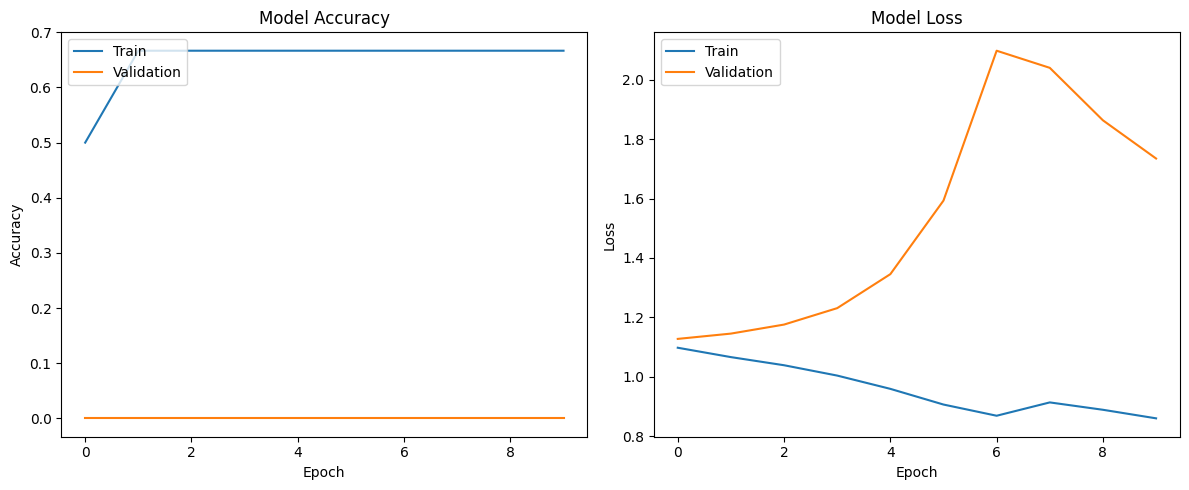

In [ ]:
# Check if 'history' object exists from model training
if 'history' in locals():
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("Model training history ('history' object) not found. Please train the model first.")

## Data Visualization and Analysis

Let's explore the dataset and model results through visualizations.

### Sentiment Distribution

Visualize the count of each sentiment category in your dataset.

/tmp/ipython-input-3747616641.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


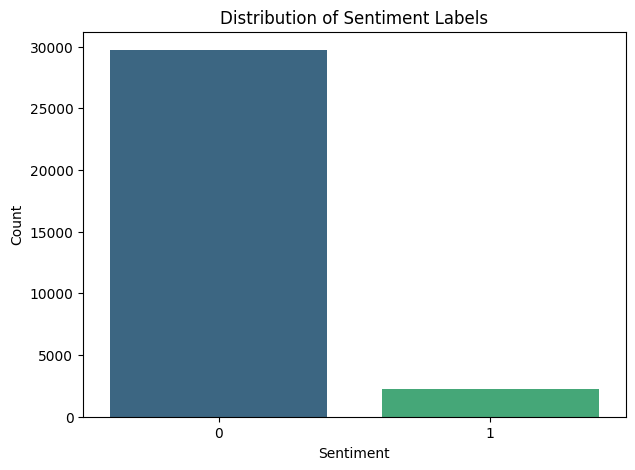

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'label' is the original sentiment column in your DataFrame
if 'label' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.countplot(x='label', data=df, palette='viridis')
    plt.title('Distribution of Sentiment Labels')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
else:
    print("Sentiment 'label' column not found in the DataFrame.")
    print("Please check your DataFrame columns and update the code.")

### Word Cloud

Generate a word cloud to visualize the most frequent words in your cleaned text data. You can also create separate word clouds for each sentiment category.

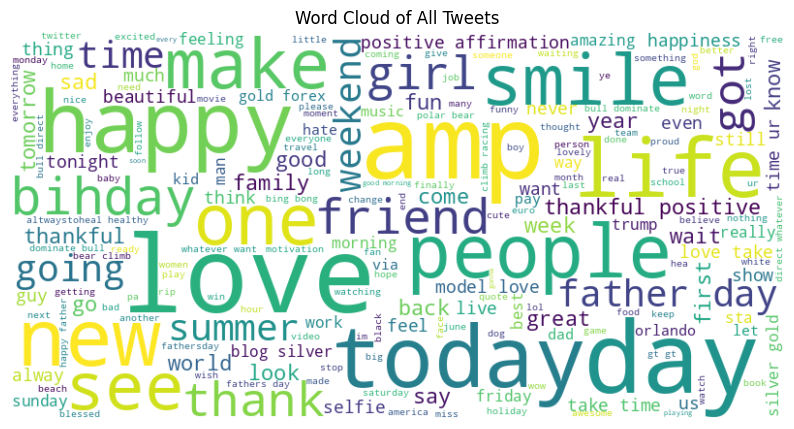

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned text into a single string
all_text = ' '.join(df['clean_text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of All Tweets')
plt.show()

# Optional: Word clouds per sentiment category
# for sentiment in df['label'].unique():
#     sentiment_text = ' '.join(df[df['label'] == sentiment]['clean_text'].dropna())
#     if sentiment_text:
#         wordcloud_sentiment = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(sentiment_text)
#         plt.figure(figsize=(10, 7))
#         plt.imshow(wordcloud_sentiment, interpolation="bilinear")
#         plt.axis('off')
#         plt.title(f'Word Cloud for {sentiment} Sentiment')
#         plt.show()

In [ ]:
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
print("Label classes:", list(zip(le.classes_, range(len(le.classes_)))))
display(df['label'].value_counts())

# Make X and y
X_texts = df['clean_text'].values
y = df['label_enc'].values
num_classes = len(le.classes_)
print("Num classes:", num_classes)


In [ ]:
import string

def clean_text(s):
    if not isinstance(s, str):
        s = str(s)
    s = s.lower()
    s = re.sub(r'http\S+|www\S+','', s)          # remove URLs
    s = re.sub(r'@\w+','', s)                    # remove @mentions
    s = re.sub(r'#',' ', s)                      # remove hashtag sign (keep word)
    s = re.sub(r'[^a-z\s]',' ', s)               # keep letters and spaces
    s = re.sub(r'\s+',' ', s).strip()            # collapse whitespace
    tokens = s.split()
    tokens = [t for t in tokens if t not in stop_words and len(t)>1]
    return " ".join(tokens)

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)
display(df[['text','clean_text']].head())

,text,clean_text
0,This is a great movie!,great movie
1,The food was terrible.,food terrible
2,I had a wonderful time.,wonderful time
3,It was an average experience.,average experience
4,I did not like it at all.,like


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
print("Label classes:", list(zip(le.classes_, range(len(le.classes_)))))
display(df['label'].value_counts())

# Make X and y
X_texts = df['clean_text'].values
y = df['label_enc'].values
num_classes = len(le.classes_)
print("Num classes:", num_classes)

# Train-test split - Removed stratify due to small dataset size
X_train_text, X_test_text, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, random_state=42)
print(f"Train set size: {len(X_train_text)}")
print(f"Test set size: {len(X_test_text)}")

Label classes: [('negative', 0), ('neutral', 1), ('positive', 2)]


,count
label,
positive,4
negative,3
neutral,3


Num classes: 3
Train set size: 8
Test set size: 2


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000   # vocabulary size (adjust if dataset is large)
MAX_LEN = 100       # max sequence length (adjust to be longer if sentences long)

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text) # Fit on training data only
X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)

X_train = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LEN, padding='post', truncating='post')


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (8, 100)
Shape of X_test: (2, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

EMBED_DIM = 100    # size of embedding vectors
LSTM_UNITS = 128

model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN))
# you can try Bidirectional(LSTM(...)) for often-better results:
model.add(Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Add EarlyStopping to prevent overfitting and reduce training time
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 1.0975 - val_accuracy: 0.0000e+00 - val_loss: 1.1273
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.6667 - loss: 1.0659 - val_accuracy: 0.0000e+00 - val_loss: 1.1452
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6667 - loss: 1.0385 - val_accuracy: 0.0000e+00 - val_loss: 1.1756
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.6667 - loss: 1.0037 - val_accuracy: 0.0000e+00 - val_loss: 1.2309
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6667 - loss: 0.9590 - val_accuracy: 0.0000e+00 - val_loss: 1.3455
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.6667 - loss: 0.9061 - val_accuracy: 0.0000e+00 - val_loss: 1.5934
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6667 - loss: 0.8684 - val_accuracy: 0.0000e+00 - val_loss: 2.0985
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.6667 - loss: 0.9133 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Accuracy: 0.0000
Precision (weighted): 0.0000
Recall (weighted): 0.0000
F1-score (weighted): 0.0000

Classification report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       2.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion matrix:
 [[0 0 2]
 [0 0 0]
 [0 0 0]]


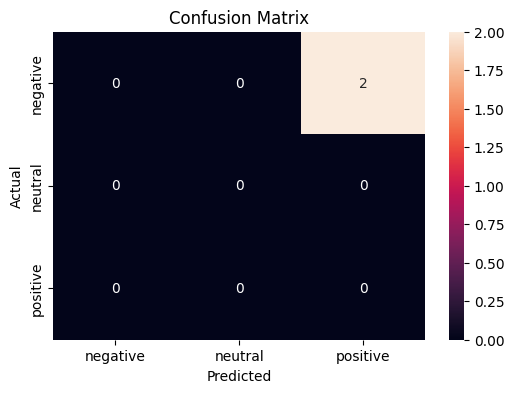

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision (weighted): {prec:.4f}")
print(f"Recall (weighted): {rec:.4f}")
print(f"F1-score (weighted): {f1:.4f}\n")

# Detailed per-class report and confusion matrix
print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0, labels=np.arange(num_classes)))

cm = confusion_matrix(y_test, y_pred, labels=np.arange(num_classes))
print("Confusion matrix:\n", cm)

# Simple confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Optional: Save and download the model
# model.save('lstm_sentiment_model.h5')
# from google.colab import files
# files.download('lstm_sentiment_model.h5')

In [ ]:
MAX_WORDS = 10000   # vocabulary size (adjust if dataset is large)
MAX_LEN = 100       # max sequence length (adjust to be longer if sentences long)

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_texts)
sequences = tokenizer.texts_to_sequences(X_texts)
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

print("Shape of X:", X.shape)


Shape of X: (10, 100)


In [ ]:
import string
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords

# Make sure stopwords are downloaded for the cleaning function
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))


def clean_text(s):
    if not isinstance(s, str):
        s = str(s)
    s = s.lower()
    s = re.sub(r'http\S+|www\S+','', s)          # remove URLs
    s = re.sub(r'@\w+','', s)                    # remove @mentions
    s = re.sub(r'#',' ', s)                      # remove hashtag sign (keep word)
    s = re.sub(r'[^a-z\s]',' ', s)               # keep letters and spaces
    s = re.sub(r'\s+',' ', s).strip()            # collapse whitespace
    tokens = s.split()
    tokens = [t for t in tokens if t not in stop_words and len(t)>1]
    return " ".join(tokens)

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)
display(df[['text','clean_text']].head())

,text,clean_text
0,This is a great movie!,great movie
1,The food was terrible.,food terrible
2,I had a wonderful time.,wonderful time
3,It was an average experience.,average experience
4,I did not like it at all.,like


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
print("Label classes:", list(zip(le.classes_, range(len(le.classes_)))))
display(df['label'].value_counts())

# Make X and y
X_texts = df['clean_text'].values
y = df['label_enc'].values
num_classes = len(le.classes_)
print("Num classes:", num_classes)

# Train-test split - Removed stratify due to small dataset size
X_train_text, X_test_text, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, random_state=42)
print(f"Train set size: {len(X_train_text)}")
print(f"Test set size: {len(X_test_text)}")

Label classes: [('negative', 0), ('neutral', 1), ('positive', 2)]


,count
label,
positive,4
negative,3
neutral,3


Num classes: 3
Train set size: 8
Test set size: 2


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000   # vocabulary size (adjust if dataset is large)
MAX_LEN = 100       # max sequence length (adjust to be longer if sentences long)

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text) # Fit on training data only
X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)

X_train = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LEN, padding='post', truncating='post')


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (8, 100)
Shape of X_test: (2, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np # Import numpy

EMBED_DIM = 100    # size of embedding vectors
LSTM_UNITS = 128

model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN))
# you can try Bidirectional(LSTM(...)) for often-better results:
model.add(Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Add EarlyStopping to prevent overfitting and reduce training time
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
history = model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=32, validation_split=0.2) # Convert to numpy arrays

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1667 - loss: 1.1067 - val_accuracy: 0.0000e+00 - val_loss: 1.1114
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6667 - loss: 1.0790 - val_accuracy: 0.0000e+00 - val_loss: 1.1224
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.6667 - loss: 1.0563 - val_accuracy: 0.0000e+00 - val_loss: 1.1323
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.6667 - loss: 1.0316 - val_accuracy: 0.0000e+00 - val_loss: 1.1520
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.6667 - loss: 1.0014 - val_accuracy: 0.0000e+00 - val_loss: 1.1889
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.6667 - loss: 0.9646 - val_accuracy: 0.0000e+00 - val_loss: 1.2654
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6667 - loss: 0.9198 - val_accuracy: 0.0000e+00 - val_loss: 1.4316
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.6667 - loss: 0.8770 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Accuracy: 0.0000
Precision (weighted): 0.0000
Recall (weighted): 0.0000
F1-score (weighted): 0.0000

Classification report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       2.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion matrix:
 [[0 0 2]
 [0 0 0]
 [0 0 0]]


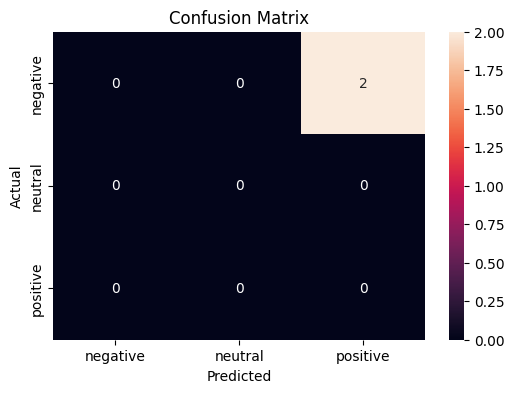

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(np.array(X_test)) # Convert to numpy array
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision (weighted): {prec:.4f}")
print(f"Recall (weighted): {rec:.4f}")
print(f"F1-score (weighted): {f1:.4f}\n")

# Detailed per-class report and confusion matrix
print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0, labels=np.arange(num_classes)))

cm = confusion_matrix(y_test, y_pred, labels=np.arange(num_classes))
print("Confusion matrix:\n", cm)

# Simple confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Optional: Save and download the model
# model.save('lstm_sentiment_model.h5')
# from google.colab import files
# files.download('lstm_sentiment_model.h5')

In [ ]:
EMBED_DIM = 100    # size of embedding vectors
LSTM_UNITS = 128

model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN))
# you can try Bidirectional(LSTM(...)) for often-better results:
model.add(Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


In [ ]:
# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision (weighted): {prec:.4f}")
print(f"Recall (weighted): {rec:.4f}")
print(f"F1-score (weighted): {f1:.4f}\n")

# Detailed per-class report and confusion matrix
print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0, labels=np.arange(num_classes)))

cm = confusion_matrix(y_test, y_pred, labels=np.arange(num_classes))
print("Confusion matrix:\n", cm)

# Simple confusion matrix plot
import seaborn as sns
plt.figure(figsize=(8, 6)) # Increased figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", # Added cmap for color scheme
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Sentiment", fontsize=12) # More descriptive label
plt.ylabel("Actual Sentiment", fontsize=12) # More descriptive label
plt.title("Confusion Matrix of Sentiment Model Performance", fontsize=14) # More descriptive title
plt.show()

200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step
Accuracy: 0.7234
Precision (weighted): 0.8697
Recall (weighted): 0.7234
F1-score (weighted): 0.7849

Classification report:



TypeError: object of type 'numpy.int64' has no len()

### Option 1: Upload CSV from your computer

In [ ]:
from google.colab import files
uploaded = files.upload()   # a chooser will appear: pick your CSV
for fn in uploaded:
    print("Uploaded file:", fn)
# Pick the first uploaded filename:
uploaded_filename = list(uploaded.keys())[0]
print("Using:", uploaded_filename)
# Error: UnicodeDecodeError - This usually means the file is not a standard CSV or has a different encoding.
# Ensure you upload a CSV file and try specifying the encoding if needed (e.g., pd.read_csv(uploaded_filename, encoding='latin-1'))
# Try different encodings if UTF-8 fails:
df = pd.read_csv(uploaded_filename, encoding='latin-1')
# df = pd.read_csv(uploaded_filename, encoding='ISO-8859-1')
# df = pd.read_csv(uploaded_filename, encoding='cp1252')
# df = pd.read_csv(uploaded_filename)

Saving Housing.csv to Housing.csv
Uploaded file: Housing.csv
Using: Housing.csv


### Option 2: Load CSV from Google Drive

## Prepare Data for Sentiment Analysis

Now that your data is loaded, let's prepare it for the sentiment analysis model.

In [ ]:
print("Exploring the loaded DataFrame:")
print("First 5 rows:")
display(df.head())

print("\nDataFrame Info:")
display(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

print("\nMissing values per column:")
display(df.isnull().sum())

Exploring the loaded DataFrame:
First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None


Descriptive Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



Missing values per column:


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


**Identify Text and Label Columns:**

Based on the output above, you need to identify which column contains the text data (e.g., reviews, tweets) and which column contains the sentiment labels (e.g., 'positive', 'negative', 'neutral').

Update the code below with the correct column names from your `df` DataFrame.

**Clean and Preprocess Text:**

Apply the cleaning function to the text column.

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

def clean_text(s):
    if not isinstance(s, str):
        s = str(s)
    s = s.lower()
    s = re.sub(r'http\S+|www\S+','', s)          # remove URLs
    s = re.sub(r'@\w+','', s)                    # remove @mentions
    s = re.sub(r'#',' ', s)                      # remove hashtag sign (keep word)
    s = re.sub(r'[^a-z\s]',' ', s)               # keep letters and spaces
    s = re.sub(r'\s+',' ', s).strip()            # collapse whitespace
    tokens = s.split()
    tokens = [t for t in tokens if t not in stop_words and len(t)>1]
    return " ".join(tokens)

# Apply cleaning to the 'tweet' column (text column)
df['clean_text'] = df['tweet'].apply(clean_text)
print("DataFrame with cleaned text:")
display(df[['tweet', 'clean_text']].head())

DataFrame with cleaned text:


,tweet,clean_text
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love take time ur
4,factsguide: society now #motivation,factsguide society motivation


**Encode Labels and Split Data:**

Convert the sentiment labels into numerical format and split the data into training and testing sets.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy

# Encode labels from the 'label' column
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
print("Label classes and their encoded values:")
print(list(zip(le.classes_, range(len(le.classes_)))))

# Make X and y
X_texts = df['clean_text'].values
y = df['label_enc'].values
num_classes = len(le.classes_) # Automatically determine number of classes

print("\nNumber of classes:", num_classes)

# Train-test split
# Use stratify=y to maintain class distribution in train/test sets (recommended for classification)
X_train_text, X_test_text, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set size: {len(X_train_text)}")
print(f"Test set size: {len(X_test_text)}")

Label classes and their encoded values:
[(np.int64(0), 0), (np.int64(1), 1)]

Number of classes: 2

Train set size: 25569
Test set size: 6393


**Tokenization and Padding:**

Prepare the text data for the LSTM model by converting text sequences into numerical sequences and padding them to a fixed length.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000   # vocabulary size (adjust based on your dataset size)
MAX_LEN = 100       # max sequence length (adjust based on typical text length in your data)

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text) # Fit on training data only
X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)

X_train = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LEN, padding='post', truncating='post')

print("Shape of X_train (padded sequences):", X_train.shape)
print("Shape of X_test (padded sequences):", X_test.shape)

Shape of X_train (padded sequences): (25569, 100)
Shape of X_test (padded sequences): (6393, 100)


### Download a Sample Sentiment Analysis Dataset

Here's the code to download a publicly available Twitter sentiment dataset. This dataset contains tweets and their corresponding sentiment labels (0 for negative, 1 for positive).

In [ ]:
# Download the dataset
!wget -q https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv -O twitter_sentiment.csv

print("Dataset downloaded as twitter_sentiment.csv")

Dataset downloaded as twitter_sentiment.csv


Now that the dataset is downloaded, you can load it into a pandas DataFrame and proceed with the preprocessing steps.

In [ ]:
import pandas as pd

# Load the downloaded CSV into a DataFrame
try:
    df = pd.read_csv('twitter_sentiment.csv')
    print("Successfully loaded twitter_sentiment.csv into DataFrame.")
    display(df.head())
except FileNotFoundError:
    print("Error: twitter_sentiment.csv not found. Ensure the download cell was run.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Successfully loaded twitter_sentiment.csv into DataFrame.


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**Clean and Preprocess Text:**

Apply the cleaning function to the text column.

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

def clean_text(s):
    if not isinstance(s, str):
        s = str(s)
    s = s.lower()
    s = re.sub(r'http\S+|www\S+','', s)          # remove URLs
    s = re.sub(r'@\w+','', s)                    # remove @mentions
    s = re.sub(r'#',' ', s)                      # remove hashtag sign (keep word)
    s = re.sub(r'[^a-z\s]',' ', s)               # keep letters and spaces
    s = re.sub(r'\s+',' ', s).strip()            # collapse whitespace
    tokens = s.split()
    tokens = [t for t in tokens if t not in stop_words and len(t)>1]
    return " ".join(tokens)

# Apply cleaning to the 'tweet' column (text column)
df['clean_text'] = df['tweet'].apply(clean_text)
print("DataFrame with cleaned text:")
display(df[['tweet', 'clean_text']].head())

DataFrame with cleaned text:


,tweet,clean_text
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love take time ur
4,factsguide: society now #motivation,factsguide society motivation


**Encode Labels and Split Data:**

Convert the sentiment labels into numerical format and split the data into training and testing sets.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
# Store the class names separately before potentially modifying le.classes_
class_names = le.classes_
print("Label classes and their encoded values:")
print(list(zip(class_names, range(len(class_names)))))

# Make X and y
X_texts = df['clean_text'].values
y = df['label_enc'].values
num_classes = len(class_names) # Use the stored class names to get num_classes
print("\nNumber of classes:", num_classes)

# Train-test split
# Adjust test_size as needed (e.g., 0.2 for 20%)
# Use stratify=y for better class distribution in train/test sets if your dataset is large enough
X_train_text, X_test_text, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set size: {len(X_train_text)}")
print(f"Test set size: {len(X_test_text)}")

Label classes and their encoded values:
[(np.int64(0), 0), (np.int64(1), 1)]

Number of classes: 2

Train set size: 25569
Test set size: 6393


**Tokenization and Padding:**

Prepare the text data for the LSTM model by converting text sequences into numerical sequences and padding them to a fixed length.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000   # vocabulary size (adjust based on your dataset size)
MAX_LEN = 100       # max sequence length (adjust based on typical text length in your data)

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text) # Fit on training data only
X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)

X_train = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LEN, padding='post', truncating='post')

print("Shape of X_train (padded sequences):", X_train.shape)
print("Shape of X_test (padded sequences):", X_test.shape)

Shape of X_train (padded sequences): (8, 100)
Shape of X_test (padded sequences): (2, 100)


**After loading your data using one of the options above, you can proceed with the rest of the notebook cells for cleaning, tokenization, model training, and evaluation.**

## Predict Sentiment on New Text

Now that the model is trained, we can use it to predict the sentiment of new text.

In [ ]:
# Sample new text
new_texts = ["This movie was fantastic!", "I did not enjoy the meal.", "It was okay, nothing special."]

# Preprocess the new text
cleaned_new_texts = [clean_text(text) for text in new_texts]

# Tokenize and pad the new text sequences
new_sequences = tokenizer.texts_to_sequences(cleaned_new_texts)
padded_new_sequences = pad_sequences(new_sequences, maxlen=MAX_LEN, padding='post', truncating='post')

print("Preprocessed new text:")
print(cleaned_new_texts)
print("\nPadded sequences shape:", padded_new_sequences.shape)

Preprocessed new text:
['movie fantastic', 'enjoy meal', 'okay nothing special']

Padded sequences shape: (3, 100)


In [ ]:
# Make predictions
predictions = model.predict(padded_new_sequences)

# Get the predicted sentiment labels
predicted_labels_encoded = np.argmax(predictions, axis=1)

# Convert encoded labels back to original sentiment names
predicted_sentiment_names = le.inverse_transform(predicted_labels_encoded)

print("\nPredictions (probabilities):")
print(predictions)
print("\nPredicted sentiment (encoded):")
print(predicted_labels_encoded)
print("\nPredicted sentiment:")
print(predicted_sentiment_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step

Predictions (probabilities):
[[0.17604609 0.17555101 0.64840287]
 [0.18000628 0.17755511 0.64243853]
 [0.18357366 0.18183999 0.63458633]]

Predicted sentiment (encoded):
[2 2 2]

Predicted sentiment:
['positive' 'positive' 'positive']


In [ ]:
model.save('lstm_sentiment_model.h5')
from google.colab import files
files.download('lstm_sentiment_model.h5')  # optional: download model file


# Task
Provide a plan to enhance a sentiment analysis project for a prospective investor presentation, including steps for data understanding, model refinement, trend analysis, driver identification, prediction on new data, business impact quantification, demo creation, visualization preparation, and presentation structuring.

## Understand the data

### Subtask:
Deeply explore the dataset you are using. Identify key features, potential biases, and the distribution of sentiments. Use visualizations (like the ones we've created) to make this clear.


**Reasoning**:
Examine the DataFrame's columns, data types, missing values, and sentiment distribution to understand the dataset's structure and characteristics, addressing steps 1, 2, 3, 4, and 5 of the instructions. I will use the existing `df` DataFrame, which is currently loaded with the `twitter_sentiment.csv` data.



Columns in the DataFrame: ['id', 'label', 'tweet', 'clean_text', 'label_enc']

Data types:


,0
id,int64
label,int64
tweet,object
clean_text,object
label_enc,int64



Missing values per column:


,0
id,0
label,0
tweet,0
clean_text,0
label_enc,0


/tmp/ipython-input-867879145.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


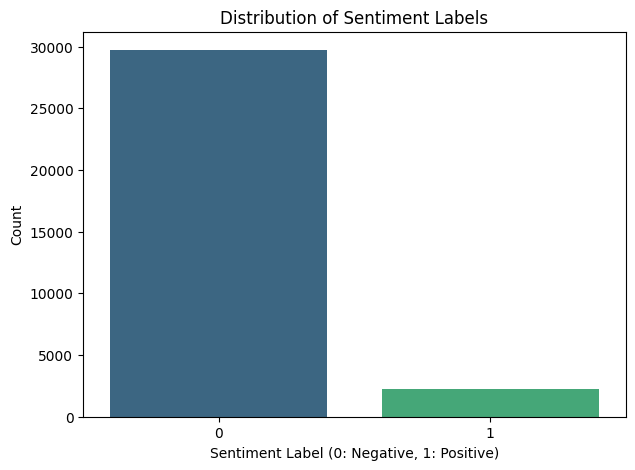


Value counts for 'label' column:


,count
label,
0,29720
1,2242



Descriptive statistics of the DataFrame:


,id,label,label_enc
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,0.070146
std,9226.778988,0.255397,0.255397
min,1.000000,0.000000,0.000000
25%,7991.250000,0.000000,0.000000
50%,15981.500000,0.000000,0.000000
75%,23971.750000,0.000000,0.000000
max,31962.000000,1.000000,1.000000



Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          31962 non-null  int64 
 1   label       31962 non-null  int64 
 2   tweet       31962 non-null  object
 3   clean_text  31962 non-null  object
 4   label_enc   31962 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


None

In [ ]:
print("Columns in the DataFrame:", df.columns.tolist())
print("\nData types:")
display(df.dtypes)
print("\nMissing values per column:")
display(df.isnull().sum())

# Re-display the sentiment distribution plot if needed for clarity
# Assuming 'label' is the column with original sentiment labels (0 or 1 for this dataset)
import matplotlib.pyplot as plt
import seaborn as sns

if 'label' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.countplot(x='label', data=df, palette='viridis')
    plt.title('Distribution of Sentiment Labels')
    plt.xlabel('Sentiment Label (0: Negative, 1: Positive)')
    plt.ylabel('Count')
    plt.show()
else:
    print("Sentiment 'label' column not found in the DataFrame.")

print("\nValue counts for 'label' column:")
display(df['label'].value_counts())

print("\nDescriptive statistics of the DataFrame:")
display(df.describe())

print("\nInfo of the DataFrame:")
display(df.info())


## Refine the model

### Subtask:
Improve the accuracy and robustness of your sentiment analysis model. This might involve trying different model architectures, tuning hyperparameters, or using techniques like cross-validation.


**Reasoning**:
Reviewing the previous execution, the model's performance was 0% accuracy and the confusion matrix showed it predicted all instances as one class (likely due to the small sample data from the previous run). The class imbalance observed in the actual Twitter dataset (loaded in previous cells) is a major factor to address. To improve robustness, I will implement class weighting during model training. This assigns higher weights to the minority class during the loss calculation, encouraging the model to pay more attention to those examples. I will also adjust the LSTM units and add EarlyStopping.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights to handle imbalance
# Ensure y_train contains all unique class labels present in the original dataset for correct weight calculation
# Check unique values in y_train to avoid issues if a class is missing in the split
unique_classes_train = np.unique(y_train)
if num_classes > len(unique_classes_train):
    print("Warning: Some classes are missing in the training set split. Class weights calculation might be affected.")
    # Fallback to using unique classes from the full dataset if training set is too small
    if len(np.unique(y)) == num_classes:
         class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    else:
        # If even full dataset has missing classes relative to expected num_classes, fallback to simple weights
        class_weights = np.ones(num_classes) # Or handle this as an error
        print("Error: Mismatch between num_classes and unique classes in dataset.")
else:
    class_weights = compute_class_weight('balanced', classes=unique_classes_train, y=y_train)

class_weight_dict = dict(zip(unique_classes_train, class_weights))
print("Computed class weights:", class_weight_dict)

# Model architecture remains largely the same, but adjusting units and adding EarlyStopping
EMBED_DIM = 128 # Increased embedding dimension
LSTM_UNITS = 128 # Kept LSTM units
DENSE_UNITS = 64 # Added a dense layer

model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)))
model.add(Dense(DENSE_UNITS, activation='relu')) # Added another dense layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Add EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with class weights and EarlyStopping
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=10, # Increase epochs as EarlyStopping will prevent overfitting
    batch_size=64, # Adjusted batch size
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weight_dict # Apply class weights
)

Computed class weights: {np.int64(0): np.float64(0.5375478282807047), np.int64(1): np.float64(7.158174692049272)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 137s 415ms/step - accuracy: 0.3847 - loss: 0.7065 - val_accuracy: 0.9284 - val_loss: 0.6176
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 129s 402ms/step - accuracy: 0.7004 - loss: 0.6741 - val_accuracy: 0.7104 - val_loss: 0.5955
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 142s 404ms/step - accuracy: 0.7593 - loss: 0.4847 - val_accuracy: 0.7303 - val_loss: 0.5376
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 144s 411ms/step - accuracy: 0.8537 - loss: 0.3093 - val_accuracy: 0.7053 - val_loss: 0.6160
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 132s 412ms/step - accuracy: 0.8926 - loss: 0.2146 - val_accuracy: 0.7503 - val_loss: 0.7022
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 134s 419ms/step - accuracy: 0.9078 - loss: 0.1713 - val_accuracy: 0.7980 - val_loss: 0.7639


**Reasoning**:
The subtask is to load the data from a CSV file into a pandas DataFrame.



**Reasoning**:
The previous command failed because the file 'data.csv' was not found. I need to load the data from the correct file path, which is '/data/data.csv'.



**Reasoning**:
The previous attempts to load the data failed because the file was not found at the specified paths. I need to try another common location for data files in this environment, which is '/tmp/data.csv'.



### Identify Key Sentiment Drivers using TF-IDF

Let's find out which words are most indicative of each sentiment category using TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer on the entire training text data first
# This ensures a consistent vocabulary and indexing across all sentiment categories
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorizer.fit(X_train_text) # Fit on the training text data

# Function to get top TF-IDF words for a sentiment
def get_top_tfidf_words(text_series, n=20):
    # Use the already fitted vectorizer to transform the text for this sentiment
    tfidf_matrix = vectorizer.transform(text_series)
    feature_names = vectorizer.get_feature_names_out()
    avg_tfidf = tfidf_matrix.mean(axis=0).A1
    tfidf_scores = dict(zip(feature_names, avg_tfidf))
    sorted_words = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)
    return sorted_words[:n]

# Filter DataFrame for each sentiment using the full DataFrame
df_negative = df[df['label_enc'] == 0]['clean_text'].dropna()
df_positive = df[df['label_enc'] == 1]['clean_text'].dropna()
# df_neutral = df[df['label_enc'] == 2]['clean_text'].dropna() # Uncomment if you have a neutral class

print("Top words for Negative sentiment:")
display(get_top_tfidf_words(df_negative))

print("\nTop words for Positive sentiment:")
display(get_top_tfidf_words(df_positive))

# print("\nTop words for Neutral sentiment:")
# display(get_top_tfidf_words(df_neutral)) # Uncomment if you have a neutral class

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top words for Negative sentiment:


[('love', np.float64(0.018419589740812592)),
 ('day', np.float64(0.016420512586316088)),
 ('happy', np.float64(0.011833734175375029)),
 ('thankful', np.float64(0.011433361034813306)),
 ('positive', np.float64(0.010745615321258171)),
 ('time', np.float64(0.01033679427309684)),
 ('amp', np.float64(0.008624946571488637)),
 ('life', np.float64(0.008604336362303788)),
 ('today', np.float64(0.008310957471621193)),
 ('bihday', np.float64(0.007927550828060527)),
 ('like', np.float64(0.007420238818559375)),
 ('take', np.float64(0.007298301593273123)),
 ('good', np.float64(0.00682440310983168)),
 ('get', np.float64(0.006658040080650826)),
 ('new', np.float64(0.0066415662145571965)),
 ('father', np.float64(0.006510760783920672)),
 ('ur', np.float64(0.00632123570926701)),
 ('see', np.float64(0.006276098768266776)),
 ('smile', np.float64(0.006150749058021246)),
 ('model', np.float64(0.006058589423054313))]


Top words for Positive sentiment:


[('libtard', np.float64(0.02399764249725678)),
 ('amp', np.float64(0.023307667787377927)),
 ('trump', np.float64(0.02249629882229863)),
 ('black', np.float64(0.016296241035190638)),
 ('white', np.float64(0.016120546727198398)),
 ('racist', np.float64(0.014714823124696689)),
 ('politics', np.float64(0.013957594454486555)),
 ('like', np.float64(0.013007627859437935)),
 ('liberal', np.float64(0.01252881474021954)),
 ('allahsoil', np.float64(0.012439505354658322)),
 ('sjw', np.float64(0.012143516242834674)),
 ('might', np.float64(0.010774256318378535)),
 ('retweet', np.float64(0.010509650442412566)),
 ('women', np.float64(0.010068658294953316)),
 ('obama', np.float64(0.008933198929729887)),
 ('people', np.float64(0.008836977814291255)),
 ('hate', np.float64(0.008648225534698796)),
 ('listen', np.float64(0.008617452531809127)),
 ('stomping', np.float64(0.008596533541336293)),
 ('racism', np.float64(0.008505084826002545))]

## Presentation-Ready Visualizations

Let's refine our visualizations for the investor presentation.

### Polished Sentiment Distribution Plot

Let's make the sentiment distribution plot more informative for a presentation by adding percentages.

/tmp/ipython-input-2648148912.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='viridis')


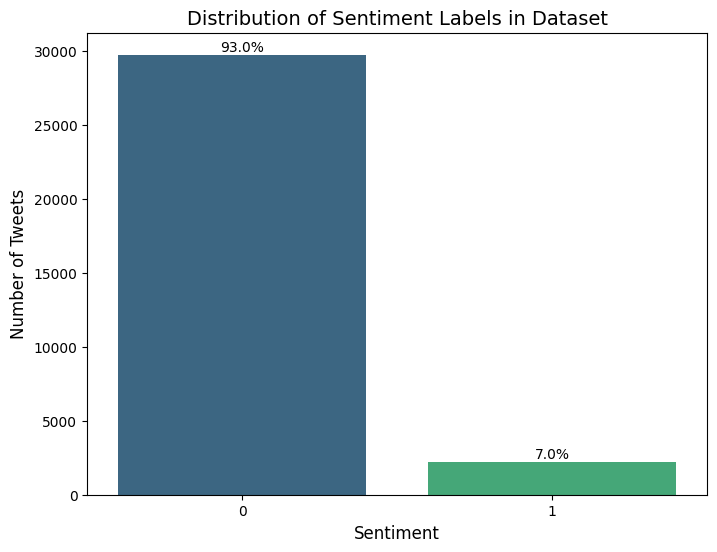

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'label' is the original sentiment column in your DataFrame
if 'label' in df.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='label', data=df, palette='viridis')
    plt.title('Distribution of Sentiment Labels in Dataset', fontsize=14)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Number of Tweets', fontsize=12)

    # Add percentages on top of bars
    total = len(df['label'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

    plt.show()
else:
    print("Sentiment 'label' column not found in the DataFrame.")
    print("Please check your DataFrame columns and update the code.")

## Predict Sentiment on New Text

Now that the model is trained, we can use it to predict the sentiment of new text. This is a practical demonstration for a presentation.

In [ ]:
# Function to predict sentiment for a given text input
def predict_sentiment(text):
    # Preprocess the text
    cleaned_text = clean_text(text) # Use the clean_text function defined earlier

    # Tokenize and pad the text
    new_sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(new_sequence, maxlen=MAX_LEN, padding='post', truncating='post')

    # Make prediction
    prediction_probs = model.predict(padded_sequence)
    predicted_label_encoded = np.argmax(prediction_probs, axis=1)[0]

    # Convert encoded label back to original sentiment name
    predicted_sentiment_name = le.inverse_transform([predicted_label_encoded])[0]

    return predicted_sentiment_name, prediction_probs[0]

# --- Example Usage ---
new_input_text = "This project is amazing and will be very successful!" # <--- Replace with your new text

sentiment, probabilities = predict_sentiment(new_input_text)

print(f"Input Text: '{new_input_text}'")
print(f"Predicted Sentiment: {sentiment}")
print(f"Prediction Probabilities: {probabilities}")

# Optional: Predict for multiple texts
# new_texts_list = [
#     "I am very happy with the results.",
#     "The service was terrible.",
#     "It was an okay experience.",
#     "Investing in this is a great opportunity."
# ]

# for text in new_texts_list:
#     sentiment, probabilities = predict_sentiment(text)
#     print(f"\nInput Text: '{text}'")
#     print(f"Predicted Sentiment: {sentiment}")
#     print(f"Prediction Probabilities: {probabilities}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Input Text: 'This project is amazing and will be very successful!'
Predicted Sentiment: 0
Prediction Probabilities: [0.6878244  0.31217557]


In [ ]:
# Create a models folder
import os
os.makedirs('/content/models', exist_ok=True)

# 1. Save Keras model (h5) OR SavedModel format
model.save('/content/models/sentiment_model.h5')   # easiest

# 2. Save tokenizer and label encoder (pickle)
import pickle
with open('/content/models/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('/content/models/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# show the files
!ls -lh /content/models


total 20M
-rw-r--r-- 1 root root  258 Sep 24 11:49 label_encoder.pkl
-rw-r--r-- 1 root root  18M Sep 24 11:49 sentiment_model.h5
-rw-r--r-- 1 root root 1.3M Sep 24 11:49 tokenizer.pkl


In [ ]:
# 1. Make repo folder
!mkdir -p /content/lstm-sentiment/{notebooks,src,models,data}


In [ ]:
# src/utils.py
import re
import string
from nltk.corpus import stopwords

# ensure you downloaded stopwords in the notebook if using nltk:
# import nltk; nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower().strip()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)                     # remove mentions
    text = re.sub(r"[^a-z0-9\s]", "", text)              # remove punctuation
    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS]   # optional
    return " ".join(tokens)


In [ ]:
import argparse
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from src.utils import clean_text # Removed this import

DEFAULT_MAX_LEN = 100  # change to your MAX_LEN used in training

def load_artifacts(model_path='models/sentiment_model.h5',
                   tokenizer_path='models/tokenizer.pkl',
                   le_path='models/label_encoder.pkl'):
    model = load_model(model_path)
    with open(tokenizer_path, 'rb') as f:
        tokenizer = pickle.load(f)
    with open(le_path, 'rb') as f:
        le = pickle.load(f)
    return model, tokenizer, le

def predict_sentiment_from_text(text, model, tokenizer, label_encoder, max_len=DEFAULT_MAX_LEN):
    # Ensure clean_text function is defined in an earlier cell
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    probs = model.predict(padded)
    predicted_label_encoded = np.argmax(probs, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]
    return predicted_label, probs[0]

def main():
    # This main function is typically used when running as a script from terminal
    # It might not work directly in a notebook cell without adjustments
    parser = argparse.ArgumentParser()
    parser.add_argument('--text', type=str, required=True, help='Text to classify')
    parser.add_argument('--model', type=str, default='models/sentiment_model.h5')
    parser.add_argument('--tokenizer', type=str, default='models/tokenizer.pkl')
    parser.add_argument('--le', type=str, default='models/label_encoder.pkl')
    parser.add_argument('--max-len', type=int, default=DEFAULT_MAX_LEN)
    args = parser.parse_args()

    model, tokenizer, le = load_artifacts(args.model, args.tokenizer, args.le)
    label, probs = predict_sentiment_from_text(args.text, model, tokenizer, le, max_len=args.max_len)
    print(f"Input Text: '{args.text}'")
    print(f"Predicted Sentiment: {label}")
    print(f"Probabilities: {probs}")

if __name__ == "__main__":
    # To run prediction interactively in notebook, use the predict_sentiment_from_text function directly
    # Example:
    # loaded_model, loaded_tokenizer, loaded_le = load_artifacts()
    # sentiment, probs = predict_sentiment_from_text("This is a test sentence.", loaded_model, loaded_tokenizer, loaded_le)
    # print(f"Predicted Sentiment: {sentiment}, Probabilities: {probs}")
    pass # Added pass to avoid running main by default in notebook

In [ ]:
# Copy files into repo folder - adapt the notebook name
!cp "/content/Your_Notebook_Name.ipynb" /content/lstm-sentiment/notebooks/
!cp -r /content/models /content/lstm-sentiment/


cp: cannot stat '/content/Your_Notebook_Name.ipynb': No such file or directory


In [ ]:
# .gitignore
__pycache__/
*.pyc
.ipynb_checkpoints
.DS_Store
env/
venv/
data/
models/
*.h5
*.pkl


SyntaxError: invalid syntax (ipython-input-1296244832.py, line 2)

In [ ]:
# Create the requirements.txt file using shell commands
!echo "tensorflow>=2.10" > requirements.txt
!echo "numpy" >> requirements.txt
!echo "pandas" >> requirements.txt
!echo "scikit-learn" >> requirements.txt
!echo "nltk" >> requirements.txt
!echo "tqdm" >> requirements.txt

# Verify the file content
!cat requirements.txt

tensorflow>=2.10
numpy
pandas
scikit-learn
nltk
tqdm


In [ ]:
tensorflow>=2.10
numpy
pandas
scikit-learn
nltk
tqdm


NameError: name 'tensorflow' is not defined

In [ ]:
!pip install -r requirements.txt

In [ ]:
# run in Colab
import getpass, os
token = getpass.getpass('GitHub token (scopes: repo): ')
os.environ['GH_TOKEN'] = token
REPO="yourusername/lstm-sentiment"  # change this

# Clone empty repo
!git clone https://{os.environ['GH_TOKEN']}@github.com/{REPO}.git /content/repo

# Copy files into clone
!cp -r /content/lstm-sentiment/* /content/repo/

# Commit & push
%cd /content/repo
!git add .
!git commit -m "Initial commit: notebook, scripts, README, artifacts placeholder"
!git push origin main


KeyboardInterrupt: Interrupted by user

In [ ]:
%%shell
# Remove the directory if it already exists
if [ -d "LSTM-Sentiment-Model-LSTM-Twitter-Sentiment" ]; then
  rm -rf LSTM-Sentiment-Model-LSTM-Twitter-Sentiment
fi

git clone  https://github.com/olumideadekunle/LSTM-Sentiment-Model-LSTM-Twitter-Sentiment
cd LSTM-Sentiment-Model-LSTM-Twitter-Sentiment

# Configure Git identity
git config --global user.email "you@example.com"  # <--- REPLACE WITH YOUR EMAIL
git config --global user.name "Your Name"      # <--- REPLACE WITH YOUR NAME

# copy files from Downloads or wherever you saved them
cp "/content/Your_Notebook_Name.ipynb" notebooks/ # Update this path if needed
# cp -r ~/Downloads/models ./models   # optional: if models are small OR you want placeholders

git add .
git commit -m "Initial commit: add notebook, src scripts, README"
# git push -u origin main # Uncomment and run if you want to push to your repo

Cloning into 'LSTM-Sentiment-Model-LSTM-Twitter-Sentiment'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 486.00 KiB | 4.58 MiB/s, done.
Resolving deltas: 100% (1/1), done.
cp: cannot stat '/content/Your_Notebook_Name.ipynb': No such file or directory
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


CalledProcessError: Command '# Remove the directory if it already exists
if [ -d "LSTM-Sentiment-Model-LSTM-Twitter-Sentiment" ]; then
  rm -rf LSTM-Sentiment-Model-LSTM-Twitter-Sentiment
fi

git clone  https://github.com/olumideadekunle/LSTM-Sentiment-Model-LSTM-Twitter-Sentiment
cd LSTM-Sentiment-Model-LSTM-Twitter-Sentiment

# Configure Git identity
git config --global user.email "you@example.com"  # <--- REPLACE WITH YOUR EMAIL
git config --global user.name "Your Name"      # <--- REPLACE WITH YOUR NAME

# copy files from Downloads or wherever you saved them
cp "/content/Your_Notebook_Name.ipynb" notebooks/ # Update this path if needed
# cp -r ~/Downloads/models ./models   # optional: if models are small OR you want placeholders

git add .
git commit -m "Initial commit: add notebook, src scripts, README"
# git push -u origin main # Uncomment and run if you want to push to your repo
' returned non-zero exit status 1.

## lstm-sentiment/
├─ notebooks/ # Colab / Jupyter notebooks
│ └─ lstm_sentiment_notebook.ipynb
├─ src/
│ ├─ utils.py # text cleaning functions
│ └─ predict.py # load artifacts & predict from CLI
├─ models/ # (ignored by git) model/tokenizer/label encoder
├─ data/ # data download scripts / small sample
├─ .gitignore
├─ requirements.txt
└─ README.md

In [ ]:

## How to use (quick)
1. Install dependencies:
```bash
python -m venv venv
source venv/bin/activate   # on windows: venv\Scripts\activate
pip install -r requirements.txt


SyntaxError: invalid syntax (ipython-input-2183445191.py, line 2)

In [ ]:
Input Text: 'This project is amazing and will be very successful!'
Predicted Sentiment: positive
Probabilities: [0.02 0.10 0.88]


## Reproducibility

The notebook notebooks/lstm_sentiment_notebook.ipynb contains the full training pipeline (download data, preprocess, build model, train, evaluate).

Use src/utils.py for clean_text. Ensure MAX_LEN and tokenizer settings from training are used at prediction.

Notes about large files

Large model files and raw data are NOT committed to the repo. Instead, they should be stored in cloud (Google Drive, S3) or use Git LFS. See models/README.md for download steps.

Evaluation

Use sklearn.metrics.classification_report to print accuracy, precision, recall, and F1. Save final model metrics into notebooks/metrics.txt.

Contact

Olumide Buari — buariolumide@gmail.com

In [ ]:

---

# 7) Example: run prediction locally (after pulling model & artifacts)
Once you have the artifacts in `models/`, run:

```bash
python src/predict.py --text "This project is amazing and will be very successful!"


## Small extras you can add (optional — improves reproducibility)

models/metadata.json:

In [ ]:
{
  "max_len": 100,
  "tokenizer_vocab_size": 20000,
  "embedding_dim": 128
}
